# Jio Prepaid Planes Recommendation Project

#### 1. Goal
The goal of this project is to analyze Jio prepaid plans and optimize pricing strategies to maximize profit while ensuring customer satisfaction. You will explore the dataset, perform customer segmentation, build predictive models, and provide actionable recommendations for pricing and marketing strategies.

##### 1.1 Variables description
• Days: Number of days the plan is valid.

• Price: Price of the plan.

• Price/Day: Price per day.

• For 365 Days: Projected price for a year.

• Profit per customer: Profit per customer on the same plan.

• From 400 Million users: Estimated data based on roughly 400 million customers.

• Data_per_day: Total data offered per day.

#### 2. Approach
For this project my tasks is:
- Prepare the data which includes cleaning the data if necessary (removing the missing values, chaning the variables format, removing duplicates and imputing or removing the outliers.
- Do an Exploratory data analysis to sumarize the data and find first data patterns through visualisations.
- Do Customers segmentation based on their preferences like data usage,price of the prepaid plan, and number of days of the plans.
- Build a classification model to predict plans suscription (to which plan a new customer or a customer is likely to choose).
- Evaluate the model using relevant metrics.
- Use optimisation techniques plans to suggest the best pricing strategies.
- Conduct a sensitivity analysis to understand the impact of price changes on profit and customer retention.
- Provide recommendations for pricing adjustments and marketing strategies to maximize profit.
#### 3. Expected Outcome
A recommendation for pricing adjustments and marketing strategies to maximize profit in compliance with customer preferences and budget.

## EDA

In [424]:
#Import the relevant librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [426]:
#import the dataset
data = pd.read_csv("Jio - Jio Prepaid Planes.csv")

In [428]:
# Read the first data rows
data.head()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5


In [430]:
# Check the data shape
data.shape

(16, 7)

**Comments:** This dataset has 16 rows and 7 columns. The 16 rows represent the 16 Jio prepaid plans

In [433]:
# Check the variable types and existing null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Days                    16 non-null     int64  
 1   Price                   16 non-null     int64  
 2   Price/Day               16 non-null     float64
 3   For 365 Days            16 non-null     float64
 4   Profit per customer     16 non-null     float64
 5   From 400 Million users  16 non-null     float64
 6   Data_per_day            16 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB


**Comments:** This dataset has no null values and the variables have are in the right formats and types

In [436]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Days,16.0,76.687500,109.140716,14.00,23.750000,28.000000,63.000000,365.000000
Price,16.0,663.812500,845.097645,119.00,206.500000,279.000000,566.250000,2879.000000
Price/Day,16.0,9.306167,2.320658,7.45,7.809355,8.544643,9.808036,14.964286
For 365 Days,16.0,3396.750914,847.040309,2719.25,2850.414434,3118.794643,3579.933035,5461.964286
Profit per customer,16.0,306.361219,345.420462,0.00,2.281250,294.933036,388.228132,1072.521739
From 400 Million users,16.0,122544.487586,138168.184724,0.00,912.500000,117973.214300,155291.252575,429008.695700
Data_per_day,16.0,1.718750,0.604669,1.00,1.500000,1.500000,2.000000,3.000000


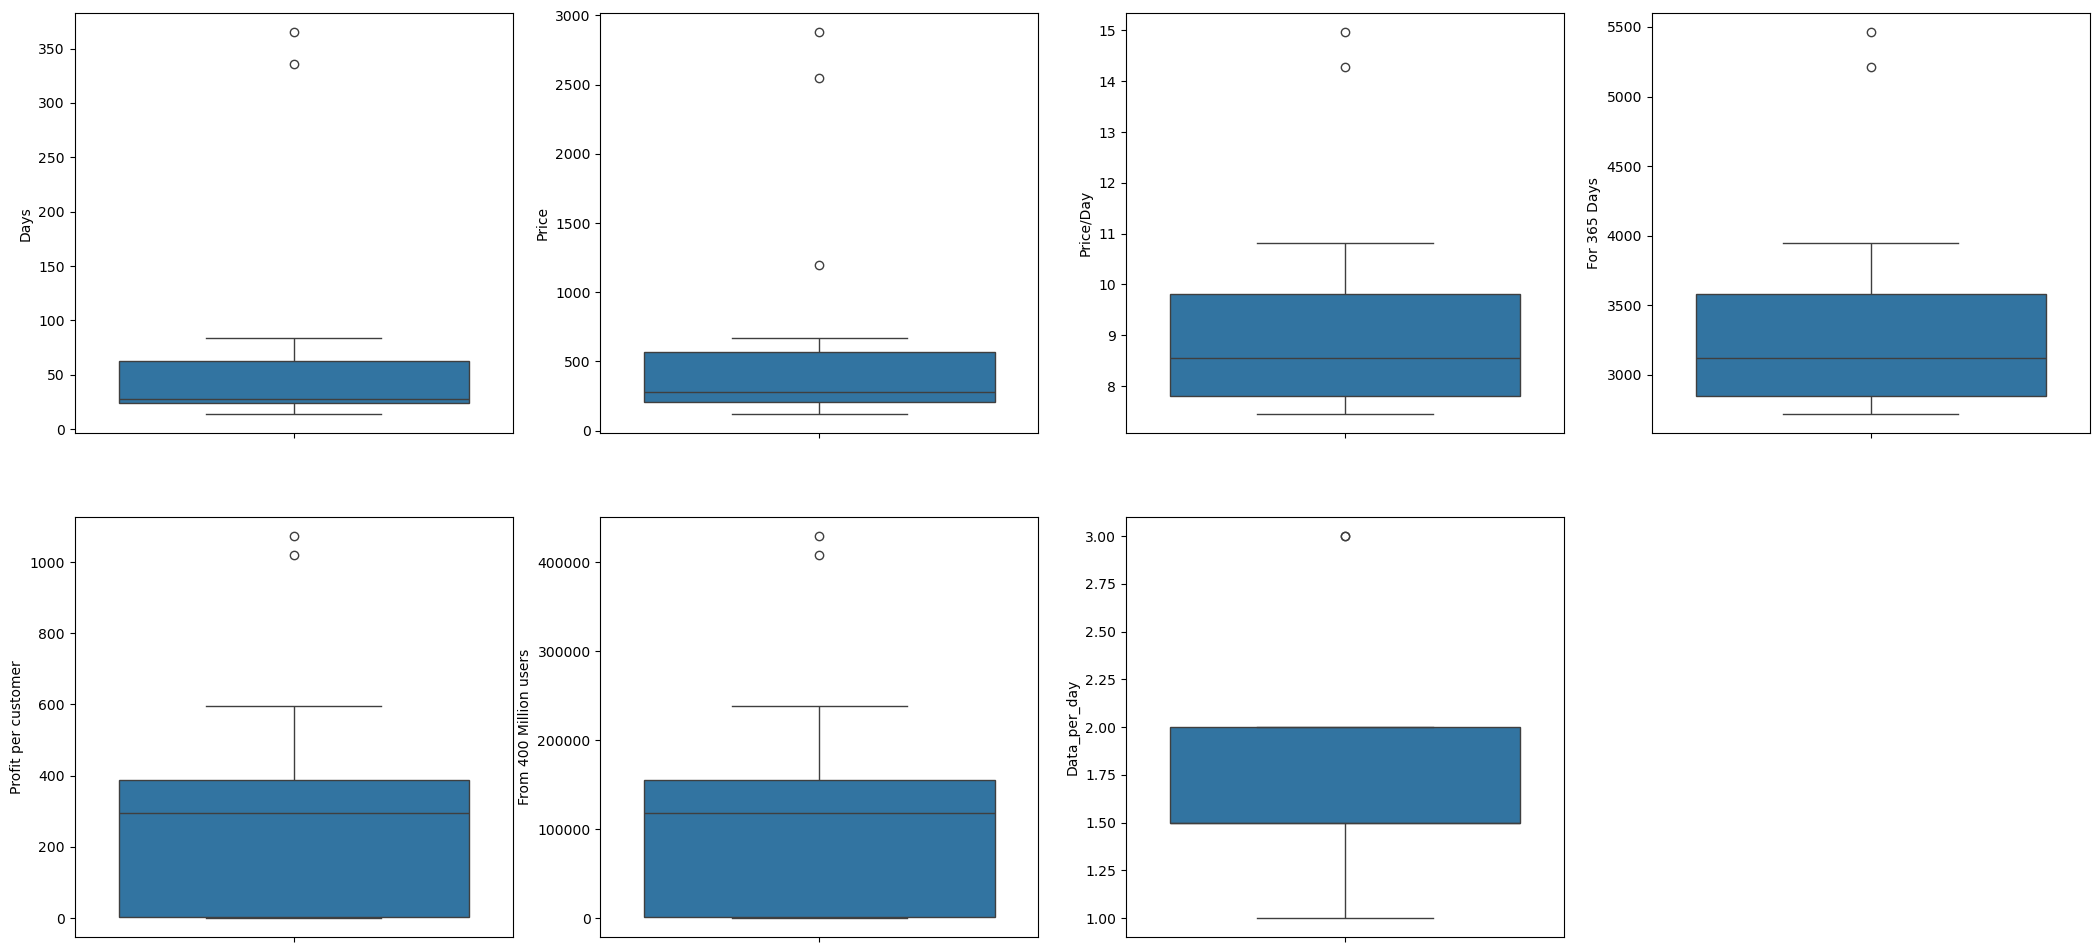

In [438]:
# Check the data distribution with boxplots
fig1 = plt.figure(figsize=(26,12))
for i, var in enumerate(data.columns):
    axes = plt.subplot(2,4,i+1)
    ax = sns.boxplot(data[var])
    plt.ylabel(var)
fig1.savefig('All variables boxplots', format='png' )   

#### Q1. Which plans make the max profit per customer and from 400M customers


In [440]:
max_profit_plan_per_cst = data['Days'].at[data['Profit per customer'].idxmax()]
print(f'The plan that makes the max profit per customer and per 400M customers is the {max_profit_plan_per_cst} days prepaid plan')

The plan that makes the max profit per customer and per 400M customers is the 23 days prepaid plan


In [441]:
# Let's print the information of that plan
data.iloc[13]

Days                          23.000000
Price                        249.000000
Price/Day                     10.826087
For 365 Days                3951.521739
Profit per customer         1072.521739
From 400 Million users    429008.695700
Data_per_day                   2.000000
Name: 13, dtype: float64

**Comments:** This plan lasts 23 days, offers a total data of 2 per day and costs 249.

#### Q2. Which plan offers max data per day.

In [447]:
max_data_per_data = data['Days'].at[data['Data_per_day'].idxmax()]
print(f'The plan that offers the max data per day is the {max_data_per_data} days prepaid plan')

The plan that offers the max data per day is the 84 days prepaid plan


In [449]:
data['Data_per_day'].idxmax()

14

In [451]:
data.iloc[14]

Days                        84.000000
Price                     1199.000000
Price/Day                   14.273810
For 365 Days              5209.940476
Profit per customer          0.000000
From 400 Million users       0.000000
Data_per_day                 3.000000
Name: 14, dtype: float64

#### Q3. Which plans have no profits

In [454]:
data[data['Profit per customer'] == float(0)]

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
2,20,149,7.450000,2719.250000,0.0,0.0,1.0
3,336,2545,7.574405,2764.657738,0.0,0.0,1.5
10,365,2879,7.887671,2879.000000,0.0,0.0,2.0
14,84,1199,14.273810,5209.940476,0.0,0.0,3.0


#### Q4. What is the profit for plan that offers 1 and 1.5 data per day

In [457]:
data[data['Data_per_day'] >= float(1.5)]

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
3,336,2545,7.574405,2764.657738,0.000000,0.00000,1.5
4,84,666,7.928571,2893.928571,129.270833,51708.33333,1.5
5,56,479,8.553571,3122.053571,357.395833,142958.33330,1.5
6,30,259,8.633333,3151.166667,386.508929,154603.57140,1.5
7,28,239,8.535714,3115.535714,350.877976,140351.19050,1.5
8,23,199,8.652174,3158.043478,393.385740,157354.29610,1.5
9,14,119,8.500000,3102.500000,337.842262,135136.90480,1.5
10,365,2879,7.887671,2879.000000,0.000000,0.00000,2.0
11,56,533,9.517857,3474.017857,595.017857,238007.14290,2.0
12,28,299,10.678571,3897.678571,1018.678571,407471.42860,2.0


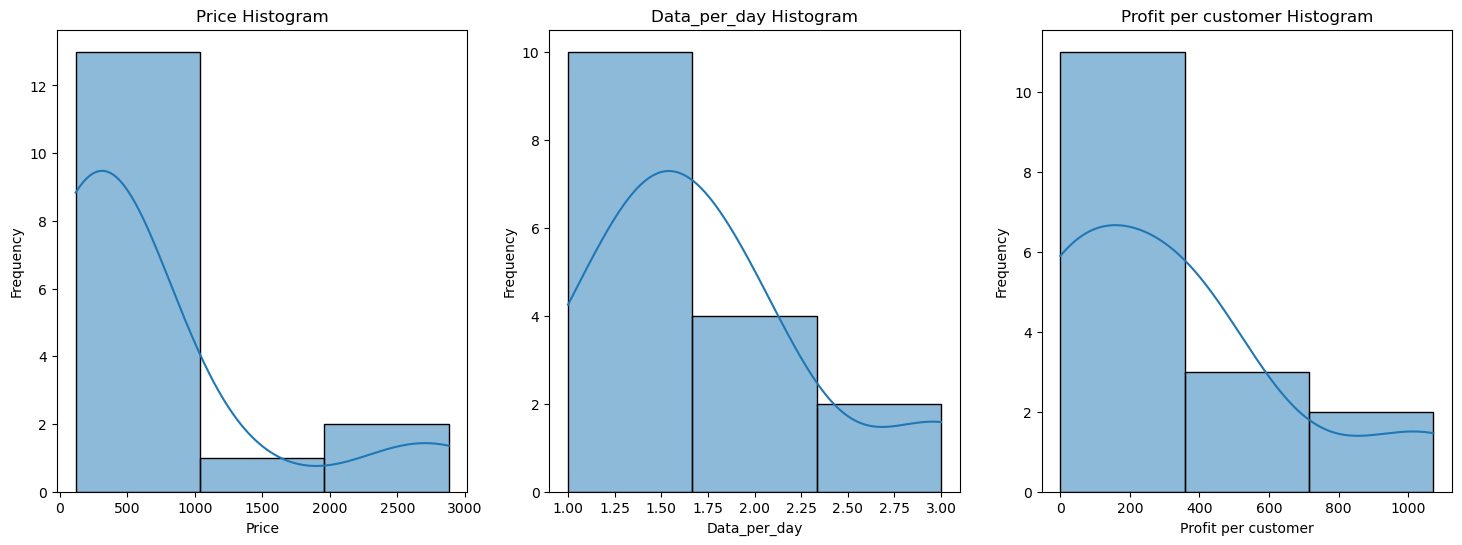

In [459]:
## distribution of the plan prices, data offered per day, and profit per customer
fig2 = plt.figure(figsize=(18,6))
for i, var in enumerate(data[["Price","Data_per_day","Profit per customer"]]):
    axes = plt.subplot(1,3,i+1)
    ax = sns.histplot(data[var], bins=3, kde=True)
    plt.ylabel('Frequency')
    plt.title(f'{var} Histogram')
fig2.savefig('Distributions', format='png' )

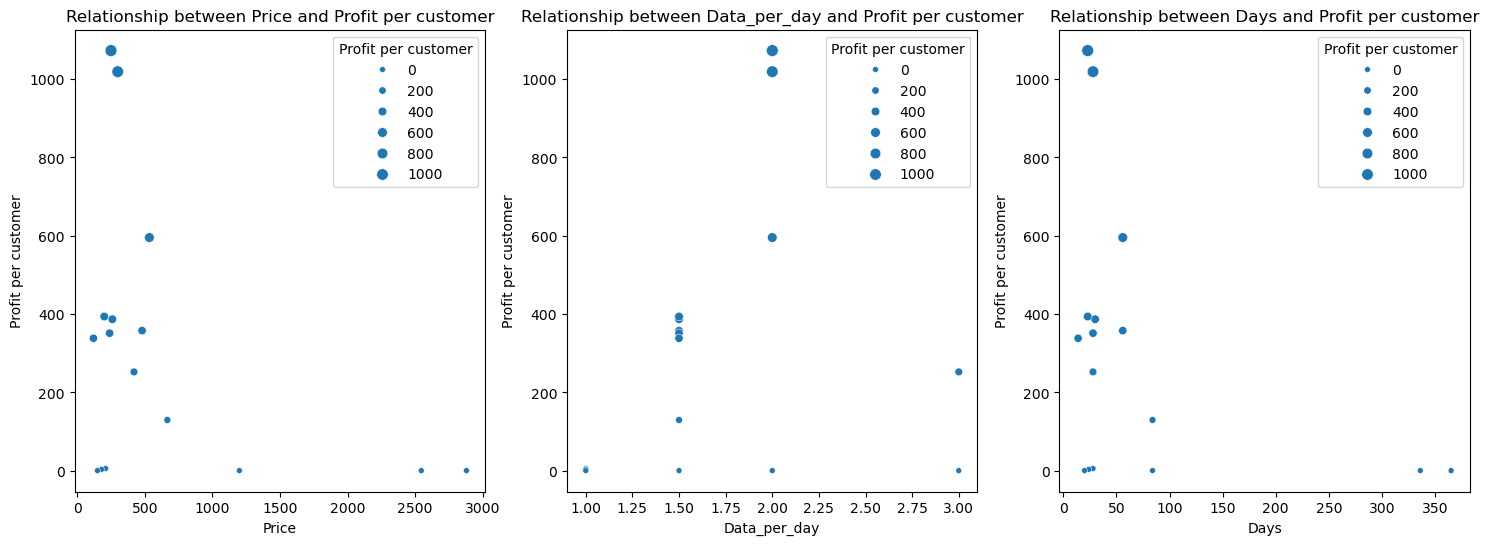

In [460]:
## Relationship between Prices, Days and Profit per customer
fig3 = plt.figure(figsize=(18,6))
for i, var in enumerate(data[["Price","Data_per_day","Days"]]):
    axes = plt.subplot(1,3,i+1)
    ax = sns.scatterplot(x=data[var], y=data["Profit per customer"], size = data["Profit per customer"],data= data)
    #plt.ylabel('Frequency')
    plt.title(f'Relationship between {var} and Profit per customer', loc='center')
fig3.savefig('Distributions', format='png' )

**Comments:** At first glance plan prices less than 500, plan data usage egal to 2G and plan days less than 50 offer more profits.

#### Q5. What is the correlation between the price, data usage, days and profit per customer

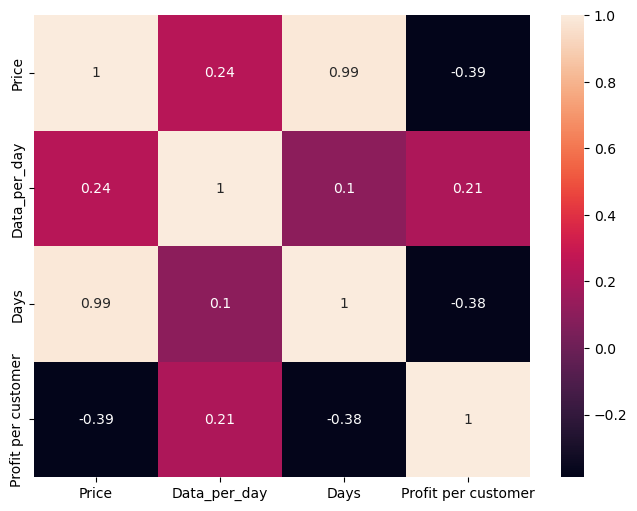

In [463]:
fig4 = plt.figure(figsize=(8,6))
sns.heatmap(data[["Price","Data_per_day","Days","Profit per customer"]].corr(), annot= True)
plt.show()

**Comments:** A strong correlation between the price and the days of the plan.

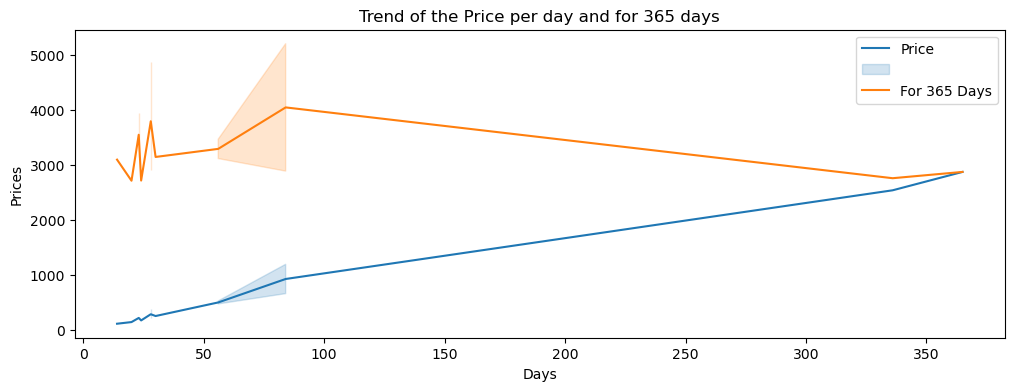

In [466]:
## Trends for Prices/Day, for 365days
fig5 = plt.figure(figsize=(12,4))
ax = sns.lineplot(x=data.Days, y=data["Price"], markers="o", data= data)
sns.lineplot(x=data.Days, y=data["For 365 Days"], data= data, ax=ax,markers="o")
plt.title('Trend of the Price per day and for 365 days')
plt.ylabel('Prices')
ax.legend(["Price","","For 365 Days"])
fig5.savefig('Price per Day and 365 days trend', format='png' )

## Customer Segmentation

In [468]:
# Compute the numbers of customers that suscribe for each plan
data['Number_of_customers'] = round(data['From 400 Million users']/data['Profit per customer'])
data.head()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day,Number_of_customers
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0,400.0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0,400.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0,NaN
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5,NaN
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5,400.0


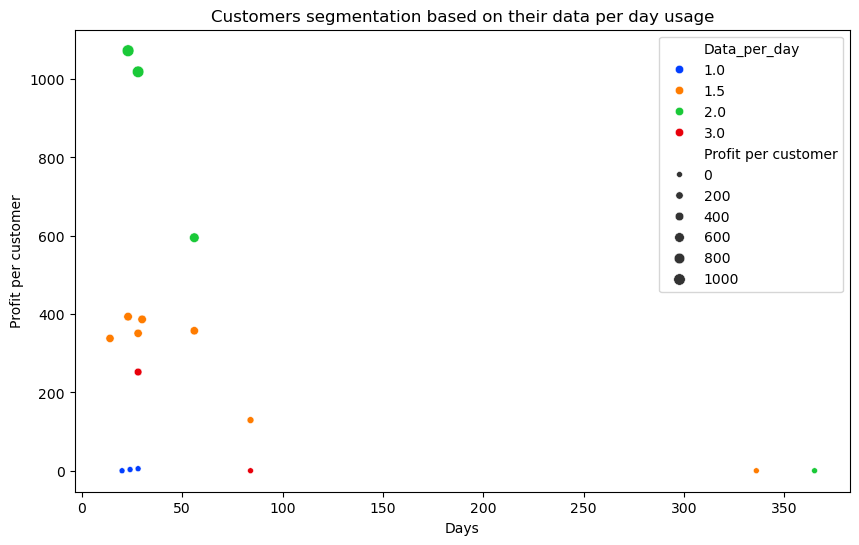

In [470]:
fig6 = plt.figure(figsize=(10,6))
sns.scatterplot(x=data["Days"], y=data["Profit per customer"], hue='Data_per_day',palette='bright' ,size=data["Profit per customer"],data=data)
plt.title('Customers segmentation based on their data per day usage')
fig6.savefig('Price per Day and 365 days trend', format='png' )

#### Q1. Identify distinct customer segments using Kmeans

In [473]:
# Use Kmeans clustering to segment customers based on their preferences
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(data[["Data_per_day","Days","Price"]])
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

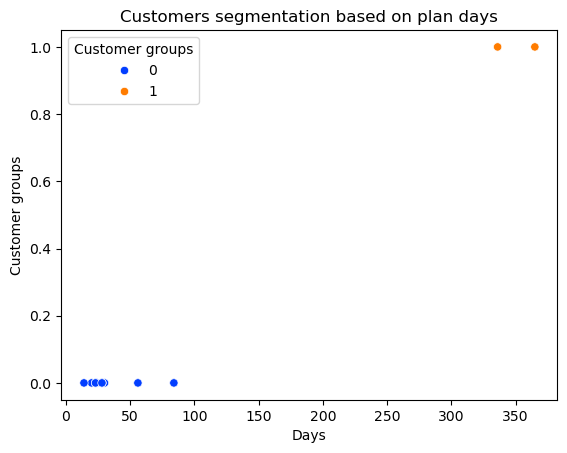

In [569]:
# Visualize customer groups by plan days
data["Customer groups"] = kmeans.labels_
sns.scatterplot(x=data["Days"], y=data["Customer groups"],hue= data["Customer groups"],palette='bright',data=data)
plt.title("Customers segmentation based on plan days")
plt.show()

**Comments:** The Kmeans model segment our customers in to two groups, the customers who likely prefer less that 84 day plans and the ones that opt for more than 300 days. We notice that the last group include very less customers.

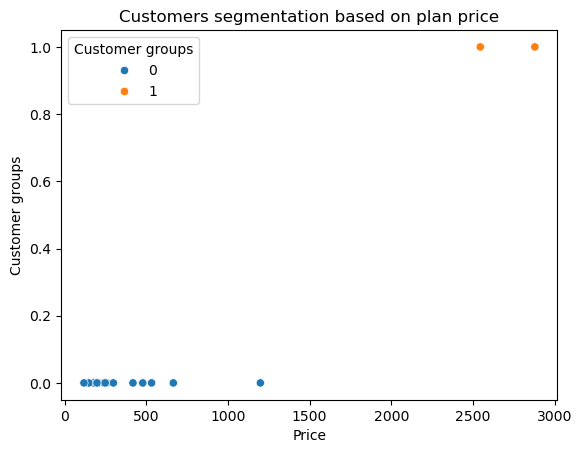

In [571]:
# Visualize customer groups by price and profit per customer
sns.scatterplot(x=data["Price"], y=data["Customer groups"],hue= data["Customer groups"],data=data)
plt.title("Customers segmentation based on plan price")
plt.show()

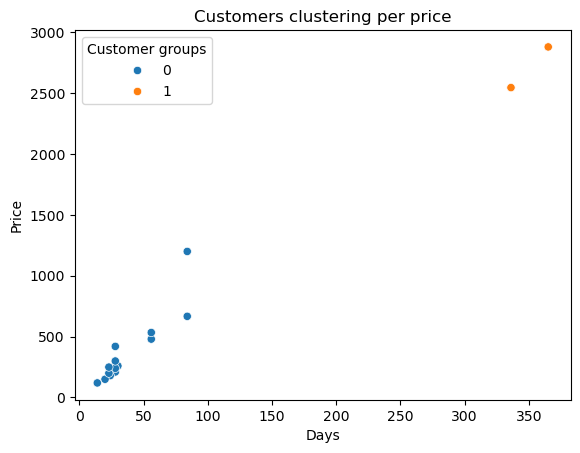

In [567]:
# Visualize customer groups by days and price
sns.scatterplot(x=data["Days"], y=data["Price"],hue= data["Customer groups"],data=data)
plt.title('Customers clustering per price')
plt.ylabel('Price')
plt.show()

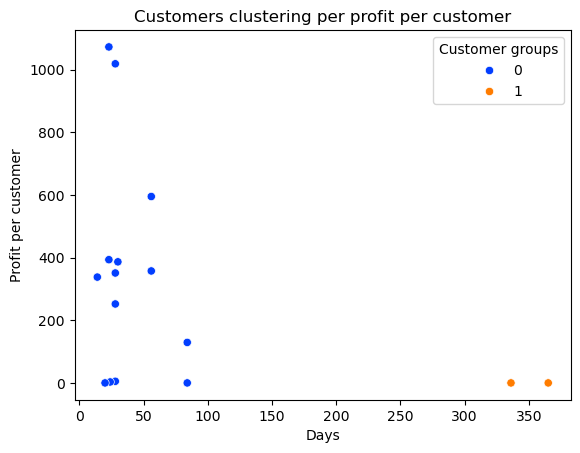

In [565]:
# Visualize customer groups by days and profit per customer
sns.scatterplot(x=data["Days"], y=data["Profit per customer"],hue= data["Customer groups"],data=data, palette='bright')
plt.title('Customers clustering per profit per customer')
plt.ylabel('Profit per customer')
plt.show()

**Comments:** More the price of the plans are expensive more the profit per customer is low, and vice versa more the price of the plans are cheap more the profit is high. Therefore plans that are less than 84 days and the price less than 1500 are more profitable for the company.
There are more customers for less than 84days plan and prices less than 700.

## Pricing Strategy Analysis

#### Q1. Calculate the average revenue per user (ARPU) for each segment.

In [489]:
arpu = data.groupby(["Customer groups"]).mean()['Profit per customer']
#print(f'The average revenue per user for each segment is {arpu}')
arpu

Customer groups
0    350.127107
1      0.000000
Name: Profit per customer, dtype: float64

**Comments:** This ARPU shows that there are no profis for the second group of customers

#### Q2. Evaluate the price elasticity of demand to understand how changes in price affect customer retention and acquisition.

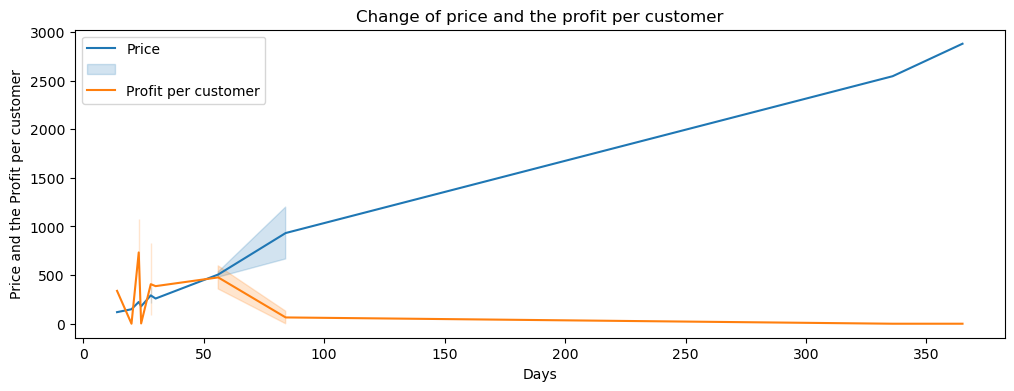

In [494]:
# PLot the Change of price and the profit per customer
fig7 = plt.figure(figsize=(12,4))
ax = sns.lineplot(x=data.Days, y=data["Price"], data= data)
sns.lineplot(x=data.Days, y=data["Profit per customer"], data= data, ax=ax)
plt.title('Change of price and the profit per customer')
plt.ylabel('Price and the Profit per customer')
ax.legend(["Price","","Profit per customer"])
fig7.savefig('Price per Day and 365 days trend', format='png' )

#### Hypothesis: Change in price affects the company revenue and also customer retention.

In [496]:
from scipy import stats
# Perform one-sample t-test
t_stat, p_value = stats.ttest_ind(data['Price'], data['Profit per customer'])
print("T statistic:", t_stat)
print("P-value:", p_value)

# Setting significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the price and the profit per customer.")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between the price and the profit per customer.")

T statistic: 1.5661114328330799
P-value: 0.12781126420095298
Fail to reject the null hypothesis; there is no significant difference between the price and the profit per customer.


**Conclusion:** This t_test reveals that there the price affects the company revenue and also the customer retention.
This means that the company should review its plan prices to improve their profit.

## Predictive Modeling

In [501]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,auc, classification_report

In [503]:
#Prepare the data for the model -> divide in to train and test sets
y = data['Customer groups']
X = data.drop(['Customer groups','Number_of_customers'], axis=1)
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3)

In [505]:
X_train

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5
5,56,479,8.553571,3122.053571,357.395833,142958.333300,1.5
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0
12,28,299,10.678571,3897.678571,1018.678571,407471.428600,2.0
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0
10,365,2879,7.887671,2879.000000,0.000000,0.000000,2.0
14,84,1199,14.273810,5209.940476,0.000000,0.000000,3.0
11,56,533,9.517857,3474.017857,595.017857,238007.142900,2.0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0
6,30,259,8.633333,3151.166667,386.508929,154603.571400,1.5


In [507]:
# Use grid search CV to choose the best parameters and model
grid_params = [{'max_iter': np.arange(10,100)}]
grid = GridSearchCV(LogisticRegression(), grid_params ,cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [508]:
model

LogisticRegression(max_iter=10)

In [509]:
# Calculate the model accuracy
y_predict = model.predict(X_test)
model_accuracy = accuracy_score(y_predict, y_test)
print(f'The model accuracy is {model_accuracy}')

The model accuracy is 1.0


In [510]:
print(f'Model classification report {classification_report(y_predict, y_test)}')

Model classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [515]:
confusion_matrix(y_predict, y_test)

array([[4, 0],
       [0, 1]])

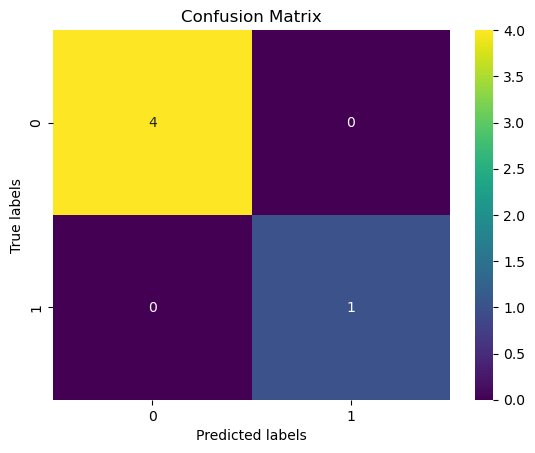

In [517]:
sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, fmt='g', cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

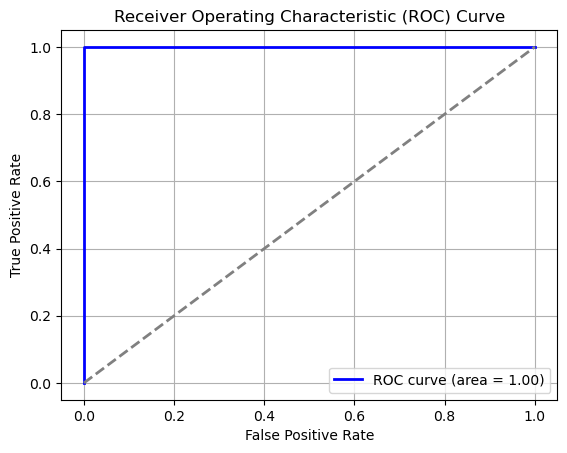

In [519]:
#Plot the ROC AUC  curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Comments**:The area under the curve is equal to 1 meaning that the prediction is perfectly done.
The model predicts the unseen data perfectly, meaning it is 100% sure that a new customer will be classified perfectly without any errors in one of the two segments.

## Optimization 

In [275]:
data

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Data_per_day,Number_of_customers,Customer groups
0,28,209,7.464286,2724.464286,5.214286,2085.714286,1.0,400.0,0
1,24,179,7.458333,2722.291667,3.041667,1216.666667,1.0,400.0,0
2,20,149,7.450000,2719.250000,0.000000,0.000000,1.0,NaN,0
3,336,2545,7.574405,2764.657738,0.000000,0.000000,1.5,NaN,1
4,84,666,7.928571,2893.928571,129.270833,51708.333330,1.5,400.0,0
5,56,479,8.553571,3122.053571,357.395833,142958.333300,1.5,400.0,0
6,30,259,8.633333,3151.166667,386.508929,154603.571400,1.5,400.0,0
7,28,239,8.535714,3115.535714,350.877976,140351.190500,1.5,400.0,0
8,23,199,8.652174,3158.043478,393.385740,157354.296100,1.5,400.0,0
9,14,119,8.500000,3102.500000,337.842262,135136.904800,1.5,400.0,0


In [297]:
data.groupby('Data_per_day').median()

,Days,Price,Price/Day,For 365 Days,Profit per customer,From 400 Million users,Number_of_customers,Customer groups
Data_per_day,,,,,,,,
1.0,24.0,179.0,7.458333,2722.291667,3.041667,1216.666667,400.0,0.0
1.5,30.0,259.0,8.535714,3115.535714,350.877976,140351.190500,400.0,0.0
2.0,42.0,416.0,10.098214,3685.848214,806.848214,322739.285750,400.0,0.0
3.0,56.0,809.0,14.619048,5335.952381,126.011905,50404.761900,400.0,0.0


In [550]:
# Create the optimazation function
from scipy.optimize import linprog

segments = segments = {
    #'Low Usage': {'data_usage': 1.0, 'budget': 170, 'duration': 24},
    'Low Usage': {'data_usage': 1.5, 'budget': 250, 'duration': 30},
    'Medium Usage': {'data_usage': 2.0, 'budget': 400, 'duration': 56},
    'High Usage': {'data_usage': 3.0, 'budget':800, 'duration': 84}
}
plans = data[['Days', 'Price', 'Data_per_day','Profit per customer']]
# Define the optimization function
def optimize_pricing(segment, plans):
    # Define constraints
    c = -plans['Profit per customer']  # Objective is to maximize profit
    A = np.array([
        plans['Data_per_day'],
        plans['Price'],
        plans['Days']
    ])
    b = np.array([
        segment['data_usage'],
        segment['budget'],
        segment['duration']
    ])
    
    # Bounds for decision variables (each plan can be chosen or not, binary decision)
    x_bounds = [(0, 1) for _ in range(len(plans))]
    
    # Perform linear programming optimization
    res = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='simplex')
    
    return res

# Run optimization for each segment
optimized_plans = {}
for segment_name, segment in segments.items():
    res = optimize_pricing(segment, plans)
    selected_plans = plans.iloc[np.where(res.x > 0.5)].reset_index(drop=True)
    optimized_plans[segment_name] = selected_plans

optimized_plans

{'Low Usage':    Days  Price  Data_per_day  Profit per customer
 0    23    249           2.0          1072.521739,
 'Medium Usage':    Days  Price  Data_per_day  Profit per customer
 0    23    249           2.0          1072.521739,
 'High Usage':    Days  Price  Data_per_day  Profit per customer
 0    28    299           2.0          1018.678571
 1    23    249           2.0          1072.521739}

In [552]:
# Sensitivity analysis function
def sensitivity_analysis(plans, segment):
    price_range = np.arange(segment['budget'] * 0.5, segment['budget'] * 1.5, 10)
    sensitivity_results = []

    for price in price_range:
        segment['budget'] = price
        res = optimize_pricing(segment, plans)
        total_profit = -res.fun
        sensitivity_results.append({'price': price, 'total_profit': total_profit})

    sensitivity_df = pd.DataFrame(sensitivity_results)
    return sensitivity_df

# Perform sensitivity analysis for each segment
sensitivity_results = {}
for segment_name, segment in segments.items():
    sensitivity_df = sensitivity_analysis(plans, segment)
    sensitivity_results[segment_name] = sensitivity_df

sensitivity_results

{'Low Usage':     price  total_profit
 0   125.0    538.414528
 1   135.0    581.487690
 2   145.0    624.560852
 3   155.0    667.634014
 4   165.0    710.707176
 5   175.0    753.780339
 6   185.0    796.853501
 7   195.0    804.391304
 8   205.0    804.391304
 9   215.0    804.391304
 10  225.0    804.391304
 11  235.0    804.391304
 12  245.0    804.391304
 13  255.0    804.391304
 14  265.0    804.391304
 15  275.0    804.391304
 16  285.0    804.391304
 17  295.0    804.391304
 18  305.0    804.391304
 19  315.0    804.391304
 20  325.0    804.391304
 21  335.0    804.391304
 22  345.0    804.391304
 23  355.0    804.391304
 24  365.0    804.391304,
 'Medium Usage':     price  total_profit
 0   200.0    861.463244
 1   210.0    904.536406
 2   220.0    947.609569
 3   230.0    990.682731
 4   240.0   1033.755893
 5   250.0   1072.521739
 6   260.0   1072.521739
 7   270.0   1072.521739
 8   280.0   1072.521739
 9   290.0   1072.521739
 10  300.0   1072.521739
 11  310.0   1072.52

In [554]:
# Generate actionable recommendations
def generate_recommendations(optimized_plans, sensitivity_results):
    recommendations = []

    for segment_name, plans in optimized_plans.items():
        sensitivity_df = sensitivity_results[segment_name]
        optimal_price = sensitivity_df.loc[sensitivity_df['total_profit'].idxmax()]['price']
        recommendation = {
            'segment': segment_name,
            'optimal_plans': plans,
            'optimal_price': optimal_price,
            'profit_impact': sensitivity_df
        }
        recommendations.append(recommendation)
    #recommendations = pd.DataFrame(recommendations)
    return recommendations

recommendations = generate_recommendations(optimized_plans, sensitivity_results)
recommendations

[{'segment': 'Low Usage',
  'optimal_plans':    Days  Price  Data_per_day  Profit per customer
  0    23    249           2.0          1072.521739,
  'optimal_price': 235.0,
  'profit_impact':     price  total_profit
  0   125.0    538.414528
  1   135.0    581.487690
  2   145.0    624.560852
  3   155.0    667.634014
  4   165.0    710.707176
  5   175.0    753.780339
  6   185.0    796.853501
  7   195.0    804.391304
  8   205.0    804.391304
  9   215.0    804.391304
  10  225.0    804.391304
  11  235.0    804.391304
  12  245.0    804.391304
  13  255.0    804.391304
  14  265.0    804.391304
  15  275.0    804.391304
  16  285.0    804.391304
  17  295.0    804.391304
  18  305.0    804.391304
  19  315.0    804.391304
  20  325.0    804.391304
  21  335.0    804.391304
  22  345.0    804.391304
  23  355.0    804.391304
  24  365.0    804.391304},
 {'segment': 'Medium Usage',
  'optimal_plans':    Days  Price  Data_per_day  Profit per customer
  0    23    249           2.0   

In [528]:
Jio_prepaid_plans_data = data.to_excel('Jio_prepaid_plans_data.xlsx')

## Findings

Our study concerns a Telecommunications company prepaid plans for their customers. They  subscribe to plans that seem to be affordable and relevant to their needs. The study of the related plans data lead to the following insights:

1. The K Means clustering model segment our customers in to two groups, the customers who likely prefer less that 84 day plans with a price of less than 700 no matter the data usage per day, and the ones that opt for more than 300 days and a price plan of more than 700 and a data usage per day more or equal than 2G. We notice that the last group includes very few customers.
2. More the price of the plans are expensive the more the profit per customer is low, and vice versa the more the price of the plans are cheap the more the profit is high. Therefore plans that are less than 84 days and the price less than 700 are more profitable for the company.
There are more customers for less than 84 day plans and prices less than 700. In fact a t-test was conducted in order to verify the hypothesis of change in price affects the company revenue and customer retention, the test reveals that the price affects the company revenue and also the customer retention. This means that the company should review its plan prices to improve their profit and the customers retention.
3. The predictive model notably the logistic regression model developed was 100% accurate, meaning that a new customer will fall into one of the customer segments without any error. For the moment we are not absolutely sure about the model performance since we don't more able to validate it. Therefore this accuracy can be justified by the low quantity of our dataset, and it is possible that the model overfits.
4. The optimization and sensitivity analysis conducted lead to a segmentation of the customers by the data usage, budget, and plan duration  generate the following actionable recommendations:
- low data usage plan:
    - Plan duration: 23 days
    - Plan price: 249
    - Plan data: 2G
    - Profit per customer: 1072.52
- Medium data usage plan:
    - Plan duration: 23 days
    - Plan price: 249
    - Plan data: 2G
    - Profit per customer: 1072.52
- High data usage plan:
    - Plan duration: 28 days or 23 days
    - Plan price: 299 or 249
    - Plan data: 2G
    - Profit per customer: 1018.67 / 1072.52